In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Analyze Data

In [2]:
df = pd.read_csv('fraudTest.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
print("\nValori lipsă:")
print(df.isnull().sum())


Valori lipsă:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


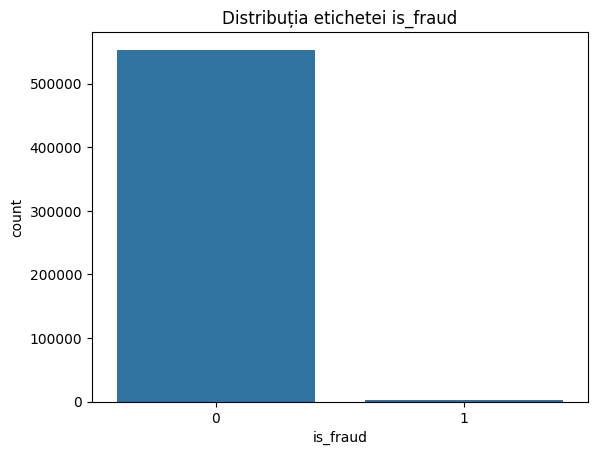


Distribuția claselor pentru 'is_fraud':
is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64


In [6]:
sns.countplot(x='is_fraud', data=df)
plt.title('Distribuția etichetei is_fraud')
plt.show()
print("\nDistribuția claselor pentru 'is_fraud':")
print(df['is_fraud'].value_counts(normalize=True))

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Data preprocessing: Converting 'object' variables to numeric variables

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])


In [9]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [10]:
print(df.dtypes)

Unnamed: 0                 int64
trans_date_trans_time      int64
cc_num                     int64
merchant                   int64
category                   int64
amt                      float64
first                      int64
last                       int64
gender                     int64
street                     int64
city                       int64
state                      int64
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int64
dob                        int64
trans_num                  int64
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [11]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2291163933867244,319,10,2.86,151,115,1,341,...,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,1,3573030041201292,591,10,29.84,163,457,0,354,...,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,2,3598215285024754,611,5,41.28,24,249,0,865,...,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0
3,3,3,3591919803438423,222,9,60.05,42,457,1,320,...,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061,0
4,4,4,3526826139003047,292,13,3.19,247,261,1,548,...,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734,0


### Data balancing

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

In [13]:
smote = SMOTE(sampling_strategy=0.75, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [14]:
enn = EditedNearestNeighbours()
X_smoteenn, y_smoteenn = enn.fit_resample(X_smote, y_smote)

In [15]:
print(f"Dimensiuni înainte de balansare: {X.shape[0]} instanțe de antrenament")
print(f"Dimensiuni după SMOTE: {X_smote.shape[0]} instanțe")
print(f"Dimensiuni după SMOTE + ENN: {X_smoteenn.shape[0]} instanțe")


Dimensiuni înainte de balansare: 555719 instanțe de antrenament
Dimensiuni după SMOTE: 968754 instanțe
Dimensiuni după SMOTE + ENN: 965563 instanțe


In [16]:
print("\nDistribuția claselor pentru SMOTE:")
print(pd.Series(y_smote).value_counts(normalize=True))

print("\nDistribuția claselor pentru SMOTE + ENN:")
print(pd.Series(y_smoteenn).value_counts(normalize=True))


Distribuția claselor pentru SMOTE:
is_fraud
0    0.571429
1    0.428571
Name: proportion, dtype: float64

Distribuția claselor pentru SMOTE + ENN:
is_fraud
0    0.570013
1    0.429987
Name: proportion, dtype: float64


C:\Users\iruss\AppData\Local\Temp\ipykernel_18612\523469800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=smote_df, palette='viridis')


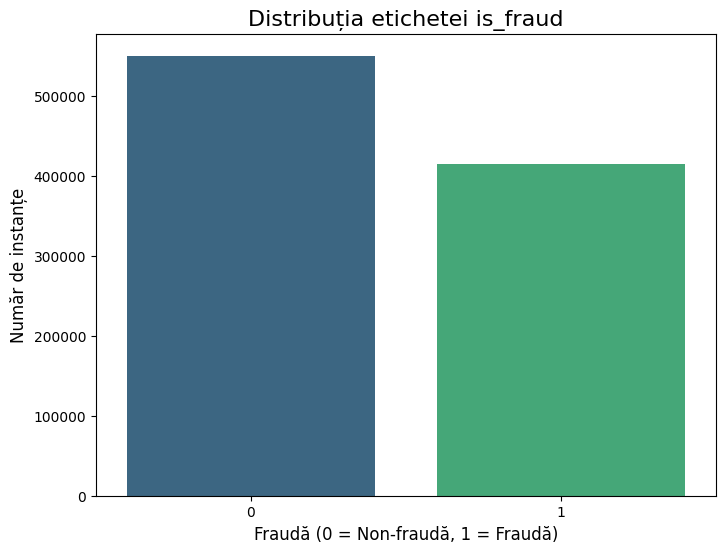

In [17]:
X_smoteenn_df = pd.DataFrame(X_smoteenn, columns=X.columns)  
y_smoteenn_df = pd.DataFrame(y_smoteenn, columns=['is_fraud'])
smote_df = pd.concat([X_smoteenn_df, y_smoteenn_df], axis=1)
plt.figure(figsize=(8, 6)) 
sns.countplot(x='is_fraud', data=smote_df, palette='viridis')  
plt.title('Distribuția etichetei is_fraud', fontsize=16)
plt.xlabel('Fraudă (0 = Non-fraudă, 1 = Fraudă)', fontsize=12)
plt.ylabel('Număr de instanțe', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Improving distribution

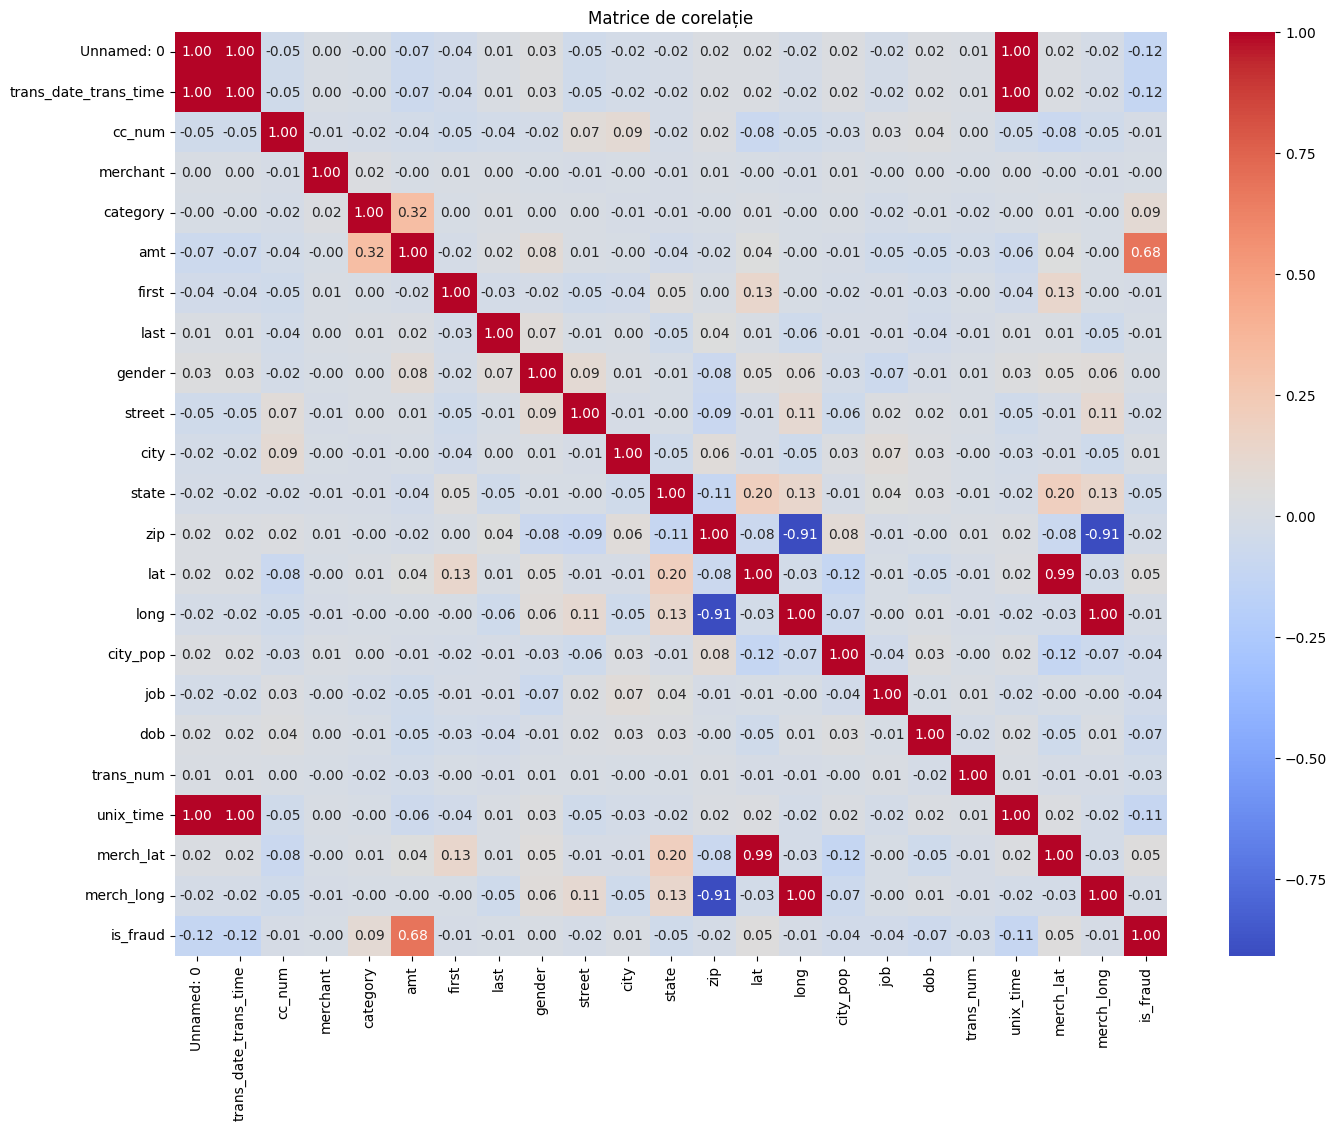

Corelațiile cu 'is_fraud':
is_fraud                 1.000000
amt                      0.684612
category                 0.092945
merch_lat                0.045716
lat                      0.045399
city                     0.013529
gender                   0.004595
merchant                -0.000062
last                    -0.006603
long                    -0.007409
merch_long              -0.007766
first                   -0.013144
cc_num                  -0.013660
street                  -0.016415
zip                     -0.018508
trans_num               -0.030194
job                     -0.038978
city_pop                -0.042633
state                   -0.051367
dob                     -0.065568
unix_time               -0.108199
trans_date_trans_time   -0.116314
Unnamed: 0              -0.116599
Name: is_fraud, dtype: float64


In [18]:
X_final = X_smoteenn.copy()
X_final['is_fraud'] = y_smoteenn
correlation_matrix = X_final.corr()


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corelație")
plt.show()

correlation_with_target = correlation_matrix['is_fraud'].sort_values(ascending=False)
print("Corelațiile cu 'is_fraud':")
print(correlation_with_target)

In [19]:
X_smoteenn.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)


In [20]:
X_smoteenn

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,319,10,2.860000,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714
1,591,10,29.840000,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431
2,611,5,41.280000,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111
3,222,9,60.050000,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061
4,292,13,3.190000,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...,...,...
965558,264,6,19.440256,0,41.8467,-74.1038,722,97,1378423274,41.073042,-75.088747
965559,251,2,139.971891,0,48.8878,-118.2105,149,414,1386161808,48.677998,-118.257327
965560,325,3,278.459717,0,36.0788,-81.1781,3495,358,1374187741,35.711836,-81.854232
965561,329,9,855.029194,1,34.2691,-95.9685,861,369,1385332695,33.453517,-96.777085


In [21]:
X_smoteenn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965563 entries, 0 to 965562
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    965563 non-null  int64  
 1   category    965563 non-null  int64  
 2   amt         965563 non-null  float64
 3   gender      965563 non-null  int64  
 4   lat         965563 non-null  float64
 5   long        965563 non-null  float64
 6   city_pop    965563 non-null  int64  
 7   job         965563 non-null  int64  
 8   unix_time   965563 non-null  int64  
 9   merch_lat   965563 non-null  float64
 10  merch_long  965563 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 81.0 MB


### Outlier detection and management

In [22]:
from scipy import stats
import numpy as np

In [23]:
z_scores = stats.zscore(X_smoteenn)
threshold = 4
outliers = np.abs(z_scores) > threshold
outliers_count = np.sum(outliers, axis=0)

print("Numărul de outlieri pe fiecare coloană (Z-score > 3):")
for col, count in zip(X_smoteenn.columns, outliers_count):
    print(f"{col}: {count} outlieri")


Numărul de outlieri pe fiecare coloană (Z-score > 3):
merchant: 0 outlieri
category: 0 outlieri
amt: 524 outlieri
gender: 0 outlieri
lat: 829 outlieri
long: 3658 outlieri
city_pop: 20931 outlieri
job: 0 outlieri
unix_time: 0 outlieri
merch_lat: 829 outlieri
merch_long: 3658 outlieri


In [24]:
non_outliers_mask = ~outliers.any(axis=1)
X_smoteenn_no_outliers = X_smoteenn[non_outliers_mask]
y_smoteenn_no_outliers = y_smoteenn[non_outliers_mask]


In [25]:
print(f"Dimensiuni X_train_no_outliers: {X_smoteenn_no_outliers.shape}")
print(f"Dimensiuni y_train_no_outliers: {y_smoteenn_no_outliers.shape}")

Dimensiuni X_train_no_outliers: (940465, 11)
Dimensiuni y_train_no_outliers: (940465,)


In [26]:
y_smoteenn_no_outliers.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

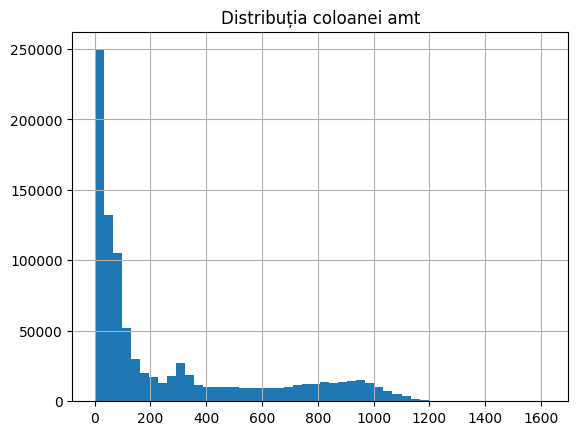

In [27]:
import matplotlib.pyplot as plt

X_smoteenn_no_outliers['amt'].hist(bins=50)
plt.title('Distribuția coloanei amt')
plt.show()


In [28]:
corr_matrix = X_smoteenn_no_outliers.corr()
print(corr_matrix)


            merchant  category       amt    gender       lat      long  \
merchant    1.000000  0.024597 -0.002665 -0.002405 -0.002079 -0.008565   
category    0.024597  1.000000  0.326950  0.003367  0.019707  0.003337   
amt        -0.002665  0.326950  1.000000  0.078027  0.055685  0.003804   
gender     -0.002405  0.003367  0.078027  1.000000  0.063083  0.084653   
lat        -0.002079  0.019707  0.055685  0.063083  1.000000 -0.087750   
long       -0.008565  0.003337  0.003804  0.084653 -0.087750  1.000000   
city_pop    0.015200  0.004790  0.005815  0.026599 -0.046162 -0.097331   
job        -0.003730 -0.023017 -0.051589 -0.086363  0.001024 -0.010093   
unix_time   0.003028 -0.002915 -0.068235  0.040626  0.017147 -0.036384   
merch_lat  -0.001887  0.019724  0.056127  0.062471  0.993960 -0.085157   
merch_long -0.008236  0.003996  0.004318  0.084314 -0.087446  0.999178   

            city_pop       job  unix_time  merch_lat  merch_long  
merchant    0.015200 -0.003730   0.003028  -

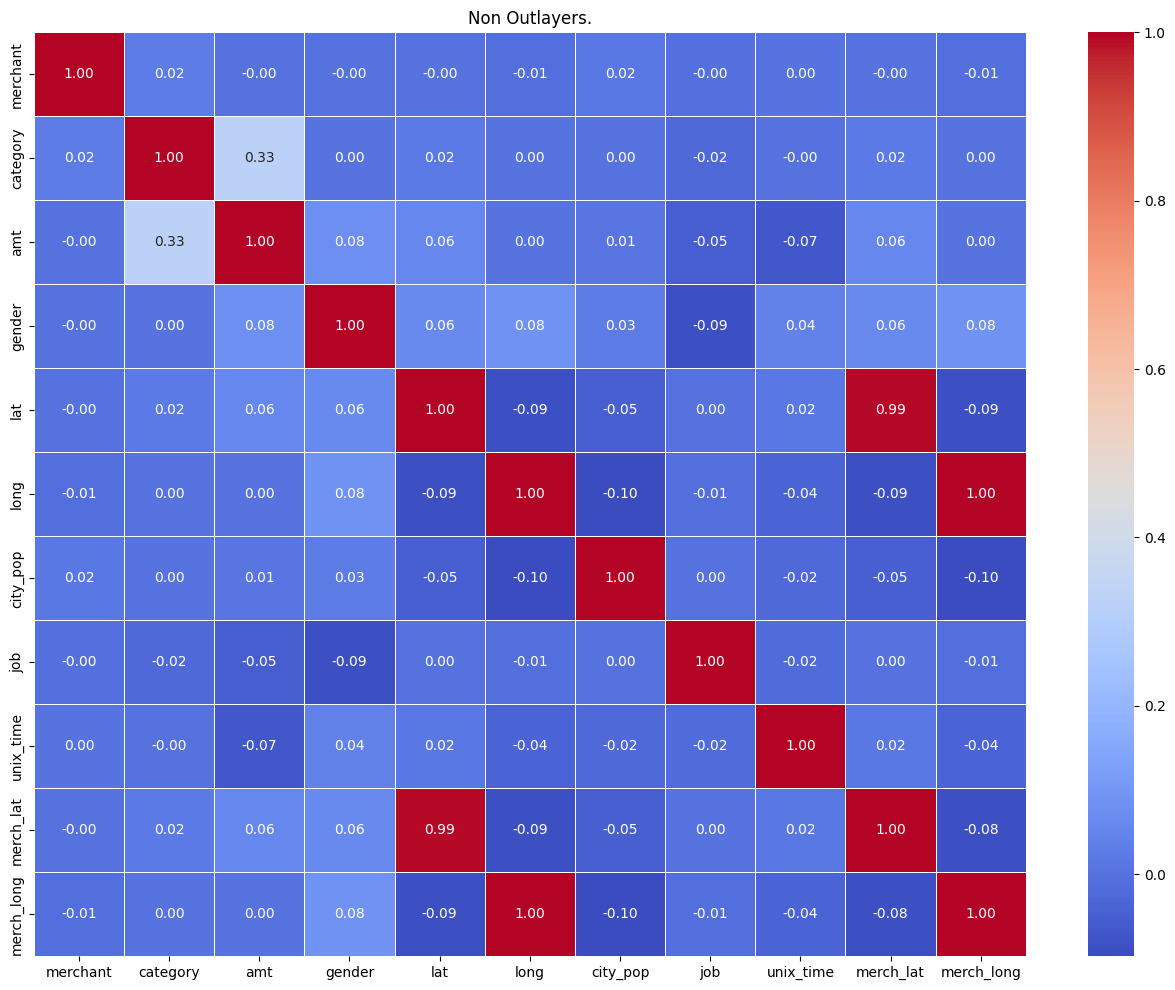

In [29]:
corr_matrix = X_smoteenn_no_outliers.corr()

plt.figure(figsize=(16, 12))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Non Outlayers.')
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_smoteenn_no_outliers)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_smoteenn_no_outliers.columns, index=X_smoteenn_no_outliers.index)
X_scaled_df

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,-0.129544,0.963864,-0.810217,1.095488,-1.004181,0.682782,2.141658,0.264030,-1.690251,-0.995888,0.662635
1,1.340956,0.963864,-0.727356,-0.912836,0.294945,-1.546737,-0.334630,1.097252,-1.690250,0.115856,-1.509687
2,1.449081,-0.420267,-0.692221,-0.912836,0.366946,1.241967,-0.080502,0.150085,-1.690246,0.328538,1.191717
3,-0.653950,0.687038,-0.634574,1.095488,-2.107338,0.691579,0.070151,1.204075,-1.690241,-2.048604,0.686628
4,-0.275512,1.794343,-0.809204,1.095488,1.098813,0.374320,-0.328506,-0.298573,-1.690241,1.236663,0.308835
...,...,...,...,...,...,...,...,...,...,...,...
965558,-0.426887,-0.143441,-0.759296,-0.912836,0.606909,1.199092,-0.331508,-1.003607,-0.357409,0.445984,1.124293
965559,-0.497168,-1.250746,-0.389117,-0.912836,2.046336,-2.134300,-0.335767,1.253926,1.203839,1.993311,-2.136380
965560,-0.097106,-0.973919,0.036210,-0.912836,-0.572236,0.664448,-0.310899,0.855119,-1.211927,-0.644823,0.613272
965561,-0.075481,0.687038,1.806980,1.095488,-0.942197,-0.453347,-0.330475,0.933456,1.036566,-1.104308,-0.513903


In [32]:
X_scaled_df

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,-0.129544,0.963864,-0.810217,1.095488,-1.004181,0.682782,2.141658,0.264030,-1.690251,-0.995888,0.662635
1,1.340956,0.963864,-0.727356,-0.912836,0.294945,-1.546737,-0.334630,1.097252,-1.690250,0.115856,-1.509687
2,1.449081,-0.420267,-0.692221,-0.912836,0.366946,1.241967,-0.080502,0.150085,-1.690246,0.328538,1.191717
3,-0.653950,0.687038,-0.634574,1.095488,-2.107338,0.691579,0.070151,1.204075,-1.690241,-2.048604,0.686628
4,-0.275512,1.794343,-0.809204,1.095488,1.098813,0.374320,-0.328506,-0.298573,-1.690241,1.236663,0.308835
...,...,...,...,...,...,...,...,...,...,...,...
965558,-0.426887,-0.143441,-0.759296,-0.912836,0.606909,1.199092,-0.331508,-1.003607,-0.357409,0.445984,1.124293
965559,-0.497168,-1.250746,-0.389117,-0.912836,2.046336,-2.134300,-0.335767,1.253926,1.203839,1.993311,-2.136380
965560,-0.097106,-0.973919,0.036210,-0.912836,-0.572236,0.664448,-0.310899,0.855119,-1.211927,-0.644823,0.613272
965561,-0.075481,0.687038,1.806980,1.095488,-0.942197,-0.453347,-0.330475,0.933456,1.036566,-1.104308,-0.513903


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y_smoteenn_no_outliers, 
    test_size=0.3, random_state=42, stratify=y_smoteenn_no_outliers
)


### Training the model XGBoost

In [34]:

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
  


In [35]:
xgb_model = XGBClassifier(tree_method='gpu_hist', use_label_encoder=False) 

In [36]:
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],  
    'max_depth': [3, 5],  
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

In [37]:
subset_X = X_train.sample(frac=0.1, random_state=42)
subset_y = y_train.loc[subset_X.index]

In [38]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=50, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)

In [39]:
random_search.fit(subset_X, subset_y)

c:\Users\iruss\Desktop\Sigmoid_Project\Project_Sigmoid_AI\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\iruss\Desktop\Sigmoid_Project\Project_Sigmoid_AI\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:00:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\iruss\Desktop\Sigmoid_Project\Project_Sigmoid_AI\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:00:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [40]:
print("Cei mai buni parametri: ", random_search.best_params_)

Cei mai buni parametri:  {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [41]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

c:\Users\iruss\Desktop\Sigmoid_Project\Project_Sigmoid_AI\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:00:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\iruss\Desktop\Sigmoid_Project\Project_Sigmoid_AI\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:00:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
print(f"Scorul final pe setul complet de date: {best_model.score(X_train, y_train)}")

c:\Users\iruss\Desktop\Sigmoid_Project\Project_Sigmoid_AI\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:00:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\iruss\Desktop\Sigmoid_Project\Project_Sigmoid_AI\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:00:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure th

Scorul final pe setul complet de date: 0.9938252382941556


In [43]:
from sklearn.metrics import accuracy_score



In [44]:
best_xgb_model = XGBClassifier(
    learning_rate=random_search.best_params_['learning_rate'],
    n_estimators=random_search.best_params_['n_estimators'],
    max_depth=random_search.best_params_['max_depth'],
    subsample=random_search.best_params_['subsample'],
    colsample_bytree=random_search.best_params_['colsample_bytree']
)

In [45]:
best_xgb_model.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred = best_xgb_model.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)

In [48]:
print(f"Scorul de acuratețe pe setul de testare: {accuracy}")

Scorul de acuratețe pe setul de testare: 0.9935351244063231


In [49]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    
    # Predicții
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
   
    if y_prob is not None:
        auc_score = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC Score: {auc_score:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    160393
           1       0.99      0.99      0.99    121747

    accuracy                           0.99    282140
   macro avg       0.99      0.99      0.99    282140
weighted avg       0.99      0.99      0.99    282140

AUC-ROC Score: 0.9996


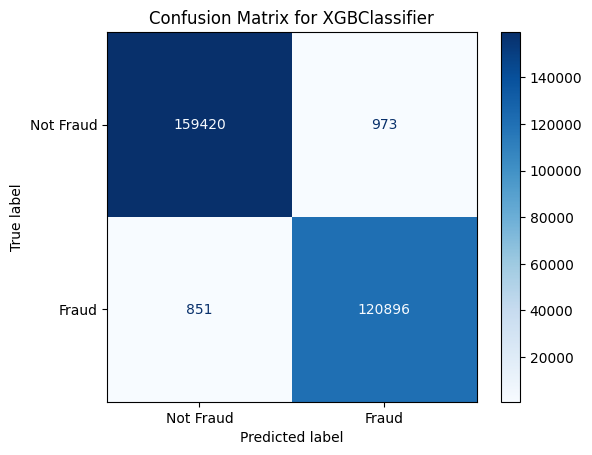

In [50]:
evaluate_model(best_xgb_model, X_train, y_train, X_test, y_test)

In [51]:
import joblib


joblib.dump(best_xgb_model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']